# Loan Approval Prediction

<b>Data Gathering</b>

In [32]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# sklearn models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [38]:
train_data=pd.read_csv('train.csv',index_col='Loan_ID')
train_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


<b>Data Prepatation</b>

array([[<Axes: title={'center': 'ApplicantIncome'}>]], dtype=object)

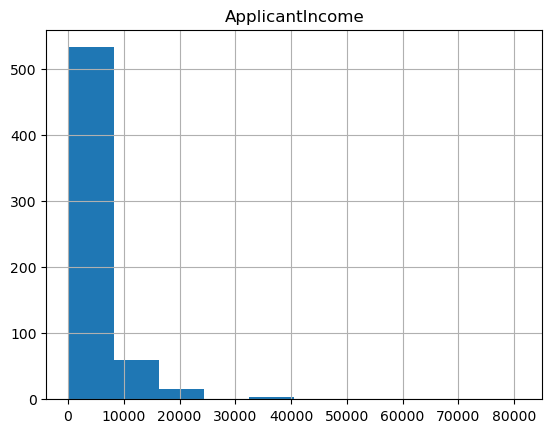

In [10]:
train_data.hist(column='ApplicantIncome')

Text(0.5, 1.0, 'Status depending on the sex')

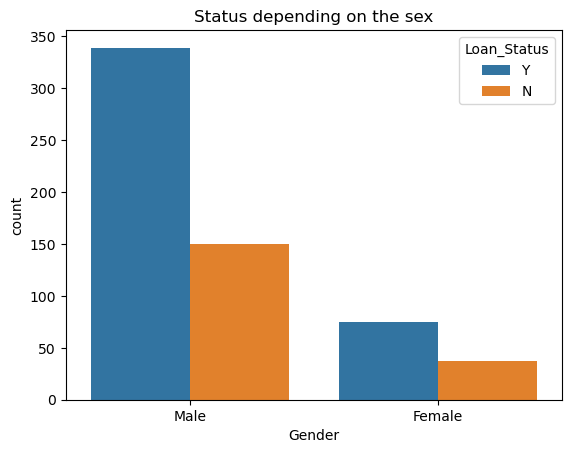

In [12]:
# number of genders eligible for loan
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.title('Status depending on the sex')

Text(0.5, 1.0, 'Status depending on the sex')

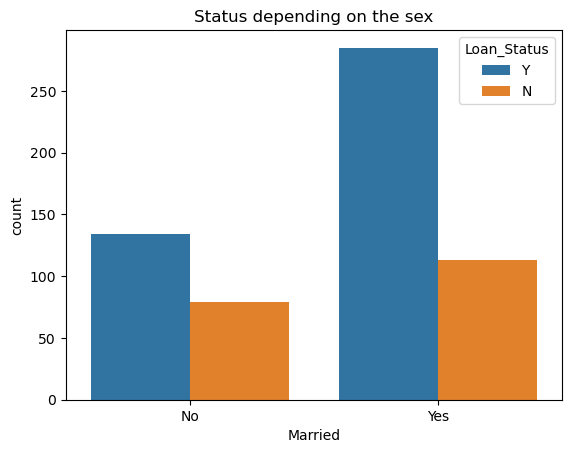

In [13]:
#number of married customers eligible for loan
sns.countplot(x='Married', hue='Loan_Status', data=train_data)
plt.title('Status depending on the sex')

# Data Processing

In [30]:
# extracted Loan Status
outcome = train_data['Loan_Status']
# dropped Loan Status
features = train_data.drop('Loan_Status',axis=1)
# One hot encoding
encoded_features= pd.get_dummies(features)
#remove Null values
encoded_features = encoded_features.fillna(0.0)

#modify outcome
outcome.replace({'Y':1,'N': 0},inplace=True)

# Train Model

In [40]:
x_train,x_test,y_train,y_test = train_test_split(encoded_features,outcome,test_size=0.20)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
def base_model(name,model):
  print(name)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  print(classification_report(y_test,prediction))
  print(accuracy_score(y_test,prediction))
  print(confusion_matrix(y_test,prediction))